<a href="https://colab.research.google.com/github/pagano81/git_test/blob/master/REDCONVOLUCIONAL_TMF_ALEXANDER_OSPINA_MART%C3%8DNEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
# Bibliotecas para redes
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
import seaborn as sns

#Algebral lineal
import numpy as np

# Graficación
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import itertools 


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Muestras de radiografías TUBERCULOSIS


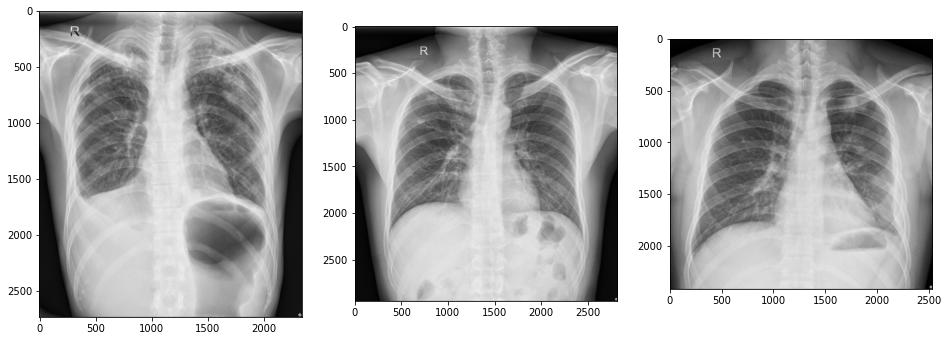

In [ ]:
def plot_three_samples(diagnostico):
    print("Muestras de radiografías " + diagnostico)
    directorio_train = '/content/drive/MyDrive/chest_xray/train/'
    img_path = directorio_train + diagnostico + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('TUBERCULOSIS')



DIRECTORIOS

In [ ]:
base_dir = '/content/drive/MyDrive/chest_xray'
entrenamiento_dir = os.path.join(base_dir, 'train')
prueba_dir = os.path.join(base_dir,'test')
validacion_dir = os.path.join(base_dir, 'val')

# Carpeta entrenamiento normal
entrenamiento_NORMAL = os.path.join(entrenamiento_dir, 'NORMAL')

#Carpeta entrenamiento neumonía bacteriana
entrenamiento_NEUMONIABac = os.path.join(entrenamiento_dir, 'PNEUMONIA_BACTERIANA')

#Carpeta entrenamiento neumonía viral
entrenamiento_NEUMONIAVir = os.path.join(entrenamiento_dir, 'PNEUMONIA_VIRAL')

#Carpeta entrenamiento tuberculosis
entrenamiento_TUBERCULOSIS = os.path.join(entrenamiento_dir, 'TUBERCULOSIS')

#Carpeta prueba neumonía bacteriana
prueba_NEUMONIABac = os.path.join(prueba_dir, 'PNEUMONIA_BACTERIANA')

#Carpeta prueba normal
prueba_NORMAL = os.path.join(prueba_dir, 'NORMAL')

#Carpeta prueba neumonía viral
prueba_NEUMONIAVir = os.path.join(prueba_dir, 'PNEUMONIA_VIRAL')

#Carpeta prueba tuberculosis
prueba_TUBERCULOSIS = os.path.join(prueba_dir, 'TUBERCULOSIS')

# Carpaeta validación normal
validacion_NORMAL = os.path.join(validacion_dir, 'NORMAL')

# Carpeta validación neumonía
validacion_NEUMONIA = os.path.join(validacion_dir, 'PNEUMONIA')

In [ ]:
print('Total imágenes de entrenamiento Normales:', len(os.listdir(entrenamiento_NORMAL)))
print('Total de imágenes de entrenamiento NEUMONÍA BACTERIANA:', len(os.listdir(entrenamiento_NEUMONIABac)))
print('Total imágenes de entrenamiento NEUMONÍA VIRAL:', len(os.listdir(entrenamiento_NEUMONIAVir)))
print('Total de imágenes de entrenamiento TUBERCULOSIS:', len(os.listdir(entrenamiento_TUBERCULOSIS)))
print('Total imágenes de validación Normales:', len(os.listdir(validacion_NORMAL)))
print('Total imágenes de validación NEUMONÍA:', len(os.listdir(validacion_NEUMONIA)))
print('Total imágenes de prueba Normales:', len(os.listdir(prueba_NORMAL)))
print('Total imágenes de prueba NEUMONÍA BACTERIANA:', len(os.listdir(prueba_NEUMONIABac)))
print('Total imágenes de prueba NEUMONÍA VIRAL:', len(os.listdir(prueba_NEUMONIAVir)))
print('Total imágenes de prueba TUBERCULOSIS:', len(os.listdir(prueba_TUBERCULOSIS)))

Total imágenes de entrenamiento Normales: 1747
Total de imágenes de entrenamiento NEUMONÍA BACTERIANA: 2528
Total imágenes de entrenamiento NEUMONÍA VIRAL: 1352
Total de imágenes de entrenamiento TUBERCULOSIS: 368
Total imágenes de validación Normales: 8
Total imágenes de validación NEUMONÍA: 8
Total imágenes de prueba Normales: 234
Total imágenes de prueba NEUMONÍA BACTERIANA: 242
Total imágenes de prueba NEUMONÍA VIRAL: 148
Total imágenes de prueba TUBERCULOSIS: 26


ADQUISICIÓN DE DATOS

In [ ]:
target_size = (500, 500)
target_dims = (500, 500, 1)
n_classes = 4
val_frac = 0.1
batch_size = 64
batch_size = 32
num_of_test_samples = 600

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5)
       #horizontal_flip=True)
train_ds = train_datagen.flow_from_directory(
        entrenamiento_dir,
        target_size= target_size,
        batch_size= batch_size,
        class_mode='categorical',
        color_mode='grayscale')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = train_datagen.flow_from_directory(
        prueba_dir,
        target_size= target_size,
        batch_size= batch_size,
        class_mode='categorical',
        color_mode='grayscale')

Found 5995 images belonging to 4 classes.
Found 650 images belonging to 4 classes.


MODELO DE RED

In [35]:

my_model = Sequential()
my_model.add(Conv2D(32, kernel_size=4, strides=1, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=target_dims))
my_model.add(BatchNormalization())
my_model.add(Conv2D(32, kernel_size=4, strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.2))
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.2))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.2))


my_model.add(Flatten())
my_model.add(Dense(512, activation= tf.keras.layers.LeakyReLU(alpha=0.01)))
my_model.add(Dropout(0.2))
#my_model.add(Dense(128, activation= tf.keras.layers.LeakyReLU(alpha=0.01)))
#my_model.add(Dropout(0.2))
#my_model.add(Dense(128, activation= tf.keras.layers.LeakyReLU(alpha=0.01)))

my_model.add(Dense(n_classes, activation='softmax'))

PARADA TEMPRANA

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

AJUSTE Y COMPILACIÓN DE LA RED

In [37]:
tf.keras.optimizers.Adam(learning_rate=0.07, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 497, 497, 32)      544       
_________________________________________________________________
batch_normalization_24 (Batc (None, 497, 497, 32)      128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 247, 247, 32)      16416     
_________________________________________________________________
batch_normalization_25 (Batc (None, 247, 247, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 120, 120, 64)     

ENTRENAMIENTO DE LA RED

In [ ]:
history = my_model.fit(train_ds, epochs=35, validation_data=test_ds,callbacks=[callback])

Epoch 1/35
 30/188 [===>..........................] - ETA: 3:19 - loss: 4.6505 - accuracy: 0.4271

GRAFICACIÓN DE APRENDIZAJE

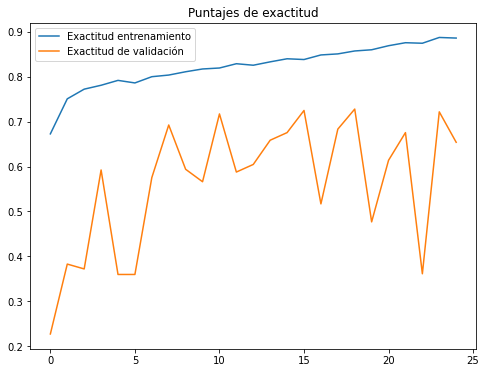

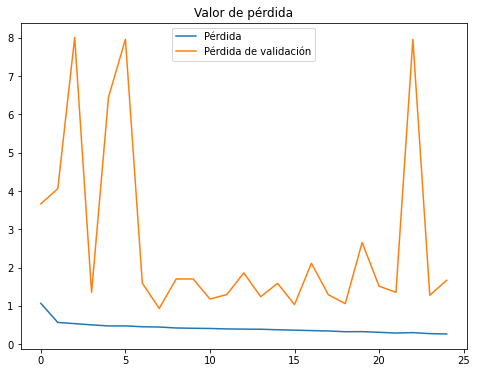

In [30]:
plt.figure(figsize=(8,6))
plt.title('Puntajes de exactitud')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Exactitud entrenamiento', 'Exactitud de validación'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Valor de pérdida')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Pérdida', 'Pérdida de validación'])
plt.show()

In [31]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Matriz de confusión normalizada")

    else:

        print('Matriz de confusión no normalizada')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('ETIQUETA VERDADERA')

    plt.xlabel('ETIQUETA PREDICHA')

In [32]:
target_names = []

for key in train_ds.class_indices:
    target_names.append(key)


# print(target_names)

MATRIZ DE COINFUSIÓN
Matriz de confusión normalizada


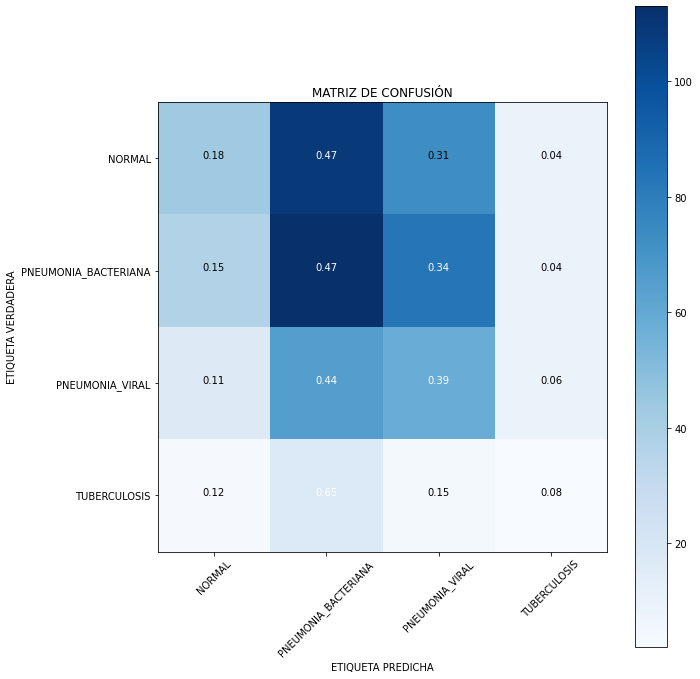

In [33]:
Y_pred = my_model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
print('MATRIZ DE COINFUSIÓN')
cm = confusion_matrix(test_ds.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='MATRIZ DE CONFUSIÓN')

VECTOR DE PREDICCIONES

MATRIZ DE CONFUSIÓN

In [34]:
Y_pred = my_model.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)
print('MATRIZ DE CONFUSIÓN')
print(confusion_matrix(test_ds.classes, y_pred))
print('REPORTE DE CLASIFICACIÓN')
classnames = ['NORMAL', 'NEUMONÍA BACTERIANA', 'NEUMONÍA VIRAL', 'TUBERCULOSIS']
print(classification_report(test_ds.classes, y_pred, target_names=classnames))

MATRIZ DE CONFUSIÓN
[[ 36 106  78  14]
 [ 32 112  93   5]
 [ 31  67  40  10]
 [  4  13   9   0]]
REPORTE DE CLASIFICACIÓN
                     precision    recall  f1-score   support

             NORMAL       0.35      0.15      0.21       234
NEUMONÍA BACTERIANA       0.38      0.46      0.41       242
     NEUMONÍA VIRAL       0.18      0.27      0.22       148
       TUBERCULOSIS       0.00      0.00      0.00        26

           accuracy                           0.29       650
          macro avg       0.23      0.22      0.21       650
       weighted avg       0.31      0.29      0.28       650



PREDICCIONES IMAGEN A IMAGEN

TypeError: ignored

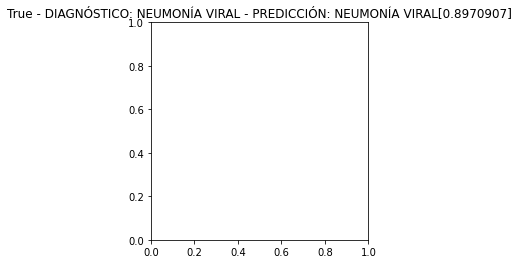

In [ ]:
class_names= ['NORMAL', 'NEUMONÍA BACTERIANA', 'NEUMONÍA VIRAL', 'TUBERCULOSIS']
def predict_one(model):  
    image_batch, classes_batch = next(test_ds)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - DIAGNÓSTICO: ' + value + ' - ' + 'PREDICCIÓN: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(my_model)  


GUARDAR EL MODELO

In [26]:
my_model.save("/content/drive/MyDrive/chest_xray/radiografias.hdf5")